# Machine Learning - Práctica Final- 

# Realizada por: DAYANA FRANCO

## OBJETIVOS:
El objetivo es predecir el precio del Airbnb utilizando los datos disponibles:
1. Aplicar las técnicas de procesamiento/transformación de variables que mejor se adecúen al problema, 
2. Identificar los modelos que proporcionen prestaciones óptimas, 
3. Las variables potencialmente más relevantes y 
4. La métrica adecuada para contrastar los distintos modelos.

## Librerías y funciones

Lo primero es cargar las librerías y funciones necesarias.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Configuración para mostrar las gráficas directamente en el notebook
%matplotlib inline 

# Configuración de colores para gráficas
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Suprimir advertencias
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

In [2]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Etiqueta predicción')
    plt.ylabel('Etiqueta real')

    plt.tight_layout()
    plt.show()


In [3]:
def calcula_metricas(confmat):
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp + tn) / (tn + fp + fn + tp)
    sen = tp / (tp + fn)
    esp = tn / (tn + fp)
    ppv = tp / (tp + fp)
    fsc = 2 * (sen * ppv) / (sen + ppv)

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)

    plt.bar(range(5), [acc, sen, esp, ppv, fsc])
    plt.xticks(range(5), ['ACC', 'SEN', 'ESP', 'PPV', 'FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5, 4.5))
    plt.ylim((0, 1.1))
    plt.title('Métricas de Clasificación')
    plt.show()


# 1. Preparación de los datos : División train/test

El objetivo es predecir el precio del Airbnb utilizando los datos disponibles.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos completo
ruta_archivo = r"C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\airbnb-listings-extract.csv"
full_df = pd.read_csv(ruta_archivo, sep=';', decimal='.')

# Dividir el conjunto de datos en train y test
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

# Imprimir dimensiones de los conjuntos de entrenamiento y prueba
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
train.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\train.csv', sep=';', decimal='.', index=False)
test.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\test.csv', sep=';', decimal='.', index=False)



Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


# 2. Análisis exploratorio

In [5]:
# Cargar el conjunto de entrenamiento
data = pd.read_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\train.csv', sep=';', decimal='.')

# a. Head, describe, dtypes
print("Primeras filas del dataset:")
print(data.head().T)

print("\nDescripción del dataset:")
print(data.describe())

print("\nTipos de datos de las columnas:")
print(data.dtypes)





Primeras filas del dataset:
                                                                                0  \
ID                                                                        5994463   
Listing Url                                  https://www.airbnb.com/rooms/5994463   
Scrape ID                                                          20170407214119   
Last Scraped                                                           2017-04-08   
Name                                             PISO ATOCHA- FLAT NEAR ATOCHA  .   
Summary                         Piso recién reformado cómoda habitación con ba...   
Space                           Un piso muy cómodo en Jerónimos, una de las zo...   
Description                     Piso recién reformado cómoda habitación con ba...   
Experiences Offered                                                          none   
Neighborhood Overview           El barrio de Jeronimos es un enclave tranquilo...   
Notes                           Facil

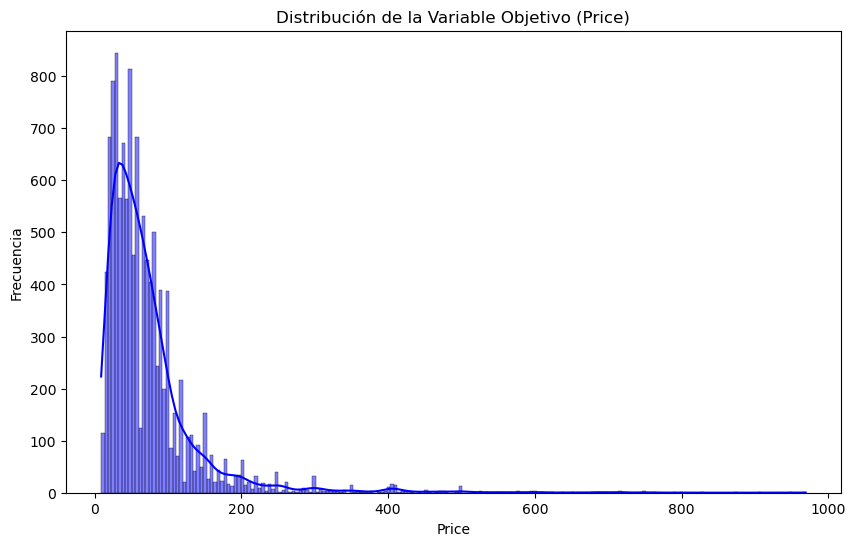

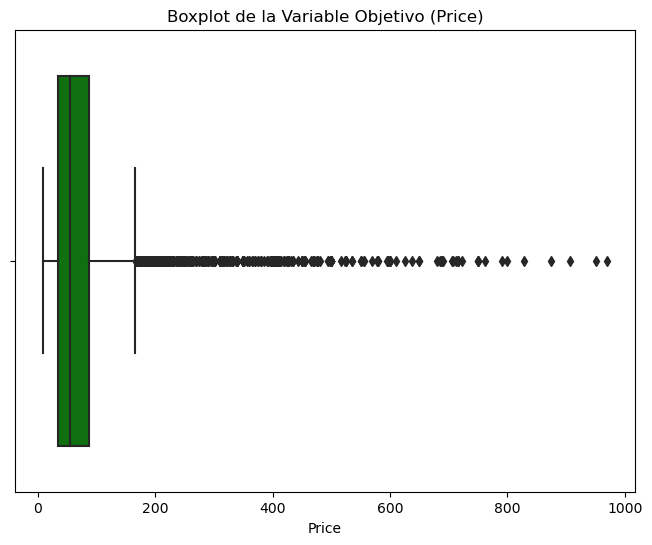

In [6]:
# b. Outliers 

import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, color='blue')
plt.title('Distribución de la Variable Objetivo (Price)')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()

# Crear un boxplot para detectar outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Price'], color='green')
plt.title('Boxplot de la Variable Objetivo (Price)')
plt.xlabel('Price')
plt.show()


In [7]:
# Obtener estadísticas descriptivas de la variable objetivo
target_variable = 'Price'
target_stats = data[target_variable].describe()

# Mostrar las estadísticas en una tabla
print(target_stats)



count    11809.000000
mean        73.712592
std         71.624844
min          9.000000
25%         34.000000
50%         55.000000
75%         87.000000
max        969.000000
Name: Price, dtype: float64


Comentarios :Los precios varían significativamente, desde un mínimo de 9, hasta un máximo de 969, con una media de aproximadamente 73.71  y una desviación estándar de 71.62. Esto sugiere que hay una amplia variabilidad en los precios de los Airbnb.  

La mayoria de los precios estan ubicados en menos de 100.

Mas del 60% son columnas que nos son enteros, son objetos. 


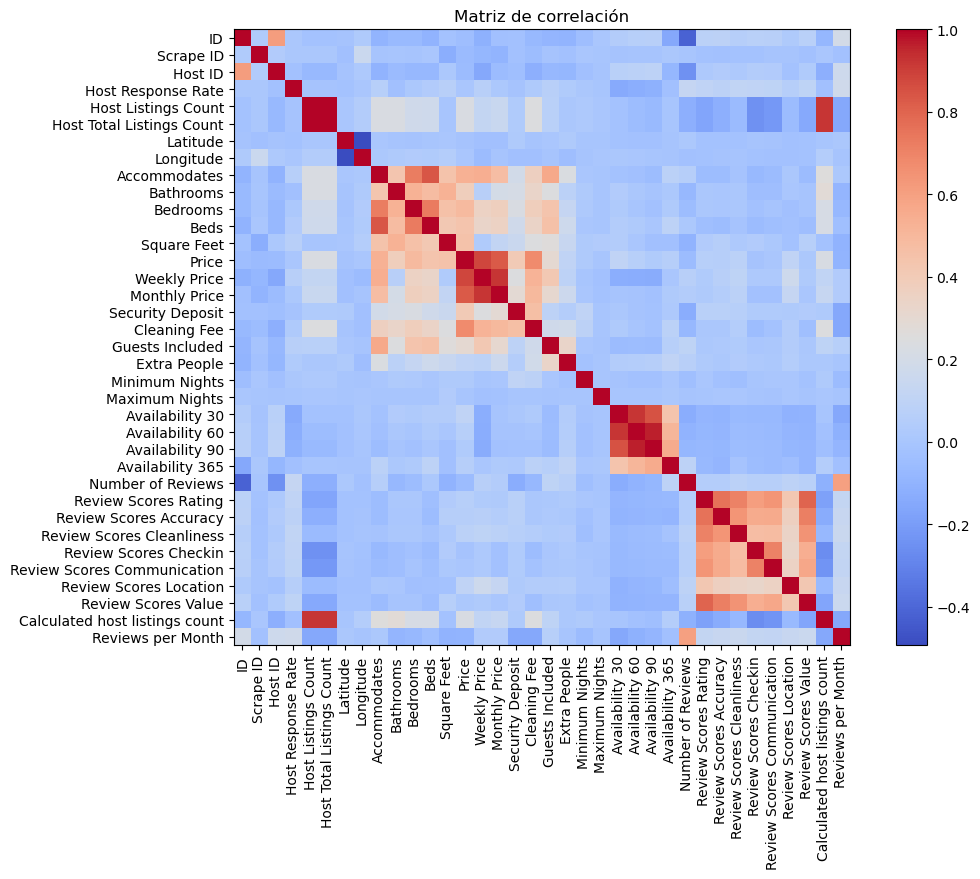

In [8]:
# c. Correlación
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
plt.title("Matriz de correlación")
# Visualización la matriz de correlación como un mapa de calor
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


Observaciones :  Se encuentran mas relacionados Host Response Rate- Host Total Listings count- Calculated hostListings count ; Accommodates- Barhrooms- Bedrooms-Beds, Square Feet, Price, cleaning fee, Reviews.

In [9]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Seleccionar la fila que corresponde a la correlación con 'Price'
price_correlations = correlation_matrix['Price']

# Crear un DataFrame con las correlaciones
correlation_df = pd.DataFrame({'Variable': price_correlations.index, 'Correlation with Price': price_correlations.values})

# Ordenar el DataFrame por el valor absoluto de la correlación en orden descendente
correlation_df['Absolute Correlation'] = abs(correlation_df['Correlation with Price'])
correlation_df = correlation_df.sort_values(by='Absolute Correlation', ascending=False)

# Mostrar las correlaciones en una tabla
print("Correlaciones con 'Price':")
print(correlation_df)


Correlaciones con 'Price':
                          Variable  Correlation with Price  \
13                           Price                1.000000   
14                    Weekly Price                0.880469   
15                   Monthly Price                0.827679   
17                    Cleaning Fee                0.674445   
8                     Accommodates                0.528380   
10                        Bedrooms                0.492316   
12                     Square Feet                0.450778   
11                            Beds                0.438198   
16                Security Deposit                0.403080   
9                        Bathrooms                0.379419   
18                 Guests Included                0.296850   
5        Host Total Listings Count                0.229585   
4              Host Listings Count                0.229585   
34  Calculated host listings count                0.223787   
22                 Availability 30         

#Comentarios:  Columnas como  
                Availability 365               
                       Scrape ID              
               Number of Reviews               
                         Host ID                
                              ID               
                 Availability 90               
                  Minimum Nights                
             Review Scores Value                      
           Review Scores Checkin                
              Host Response Rate               
     Review Scores Communication               
                  Maximum Nights

Tienen muy poca relación con el precio y al parecer no influyen para el estudio de éste. Las guardo y elimino.

##  3. Preprocesamiento de variables



1. Eliminación de variables mediante selección inicial: información sobre direcciones url, multiplicacion del precio por noche: precio por semana, o por mes; columnas con información repetida; que no aporten información sobre la propiedad, y las columnas tambien que guardan muy poca relación con el precio, se eliminaran.

<div class = "alert alert-success"> 1

In [10]:
columnas_a_eliminar = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'House Rules',
    'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
    'Host About', 'Host Response Time', 'Host Response Rate',
    'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
    'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count',
    'Host Verifications', 'Extra People', 'Minimum Nights', 'Maximum Nights',
    'Calendar Updated', 'Has Availability', 'Availability 30',
    'Availability 60', 'Availability 90', 'Availability 365',
    'Calendar last Scraped', 'First Review', 'Last Review', 'License',
    'Jurisdiction Names', 'Calculated host listings count', 'Reviews per Month',
    'Geolocation', 'Features' 
]

# Eliminar las columnas del conjunto de entrenamiento
train = train.drop(columns=columnas_a_eliminar)

# Verificar las nuevas dimensiones de los conjuntos de entrenamiento
print(f'Dimensiones del conjunto de entrenamiento después de eliminar columnas: {train.shape}')

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
train.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\train.csv', sep=';', decimal='.', index=False)

Dimensiones del conjunto de entrenamiento después de eliminar columnas: (11824, 47)


In [11]:
print(train.head().T)

                                                                          2472   \
Name                                           PISO ATOCHA- FLAT NEAR ATOCHA  .   
Summary                       Piso recién reformado cómoda habitación con ba...   
Space                         Un piso muy cómodo en Jerónimos, una de las zo...   
Description                   Piso recién reformado cómoda habitación con ba...   
Experiences Offered                                                        none   
Neighborhood Overview         El barrio de Jeronimos es un enclave tranquilo...   
Notes                         Facilitamos guía de eventos y rutas turísticas...   
Transit                       Excelente ubicación a tan solo 5 minutos andan...   
Access                        La conexión a internet por fibra óptica 100 MB...   
Interaction                   Recibimos personalmente a nuestros huéspedes y...   
Street                        Jerónimos, Madrid, Comunidad de Madrid 28014, ...   
Neig

3.2 Escoger la columnas con solo texto y otras que requieren análisis especial y por ahora no ayudan a la predicción de precio.

<div class = "alert alert-success"> 2

In [12]:
# Lista de columnas a eliminar por tener demasiado texto (requieren análisis NLP)
columnas_texto = [
    'Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
    'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction'
]

# Eliminar las columnas de texto del conjunto de entrenamiento
train = train.drop(columns=columnas_texto)

# Verificar las nuevas dimensiones del conjunto de entrenamiento
print(f'Dimensiones del conjunto de entrenamiento después de eliminar columnas de texto: {train.shape}')

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
train.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\train.csv', sep=';', decimal='.', index=False)


Dimensiones del conjunto de entrenamiento después de eliminar columnas de texto: (11824, 37)


3.3 Sigo buscando columnas que no aportan: Valores NAN - NULOS

<div class = "alert alert-success">3

In [13]:
# Calcular la cantidad de NaN en cada columna del conjunto de entrenamiento
nan_counts_train = train.isna().sum()

# Establecer un umbral
threshold = 100


# Filtrar las columnas con un número específico de NaN
columns_with_many_nan_train = nan_counts_train[nan_counts_train > threshold].index.tolist()

# Ordenar las columnas por la cantidad de NaN en orden descendente (de mayor a menor)
columns_with_many_nan_train = sorted(columns_with_many_nan_train, key=lambda x: nan_counts_train[x], reverse=True)

# Iterar a través de las columnas ordenadas y mostrar sus nombres y cantidades
for column_name in columns_with_many_nan_train:
    nan_count = nan_counts_train[column_name]
    print(f'Columna: {column_name}, NaN Count: {nan_count}')



Columna: Square Feet, NaN Count: 11350
Columna: Monthly Price, NaN Count: 8955
Columna: Weekly Price, NaN Count: 8943
Columna: Security Deposit, NaN Count: 6772
Columna: Cleaning Fee, NaN Count: 4850
Columna: Neighbourhood, NaN Count: 4159
Columna: Review Scores Value, NaN Count: 2692
Columna: Review Scores Location, NaN Count: 2691
Columna: Review Scores Checkin, NaN Count: 2688
Columna: Review Scores Accuracy, NaN Count: 2681
Columna: Review Scores Communication, NaN Count: 2677
Columna: Review Scores Cleanliness, NaN Count: 2676
Columna: Review Scores Rating, NaN Count: 2661
Columna: Neighbourhood Group Cleansed, NaN Count: 818
Columna: Zipcode, NaN Count: 398
Columna: Amenities, NaN Count: 141
Columna: State, NaN Count: 119


## Comentarios:
Hay demasiados NAN en Square Feet, aunque inicialmente parecía que esta variable podría aportar información, por la falta de información se opta por eliminarla.

Referente a las columnas Monthly y WeeklY las pocas filas con información, pueden modificar la predicción , asi que tambien se eliminan.

Elimino Neighbourhood --> Estudiar su eliminacion ya que  el 50% de los datos contienen NA, lo eliminé y se presentó una reduccion en el dataset y habrian otras columnas relacionadas que pueden aportar informacion.  Decido revisar mas adelante.


Valores de Security Deposit, y Cleaning Feet afectan directamente en el precio --> NO elimino, y debo solucionar.


<div class = "alert alert-success"> 4

In [14]:
columns_with_na_to_remove = [
    'Review Scores Location', 'Review Scores Value',
    'Review Scores Checkin', 'Review Scores Accuracy', 'Review Scores Communication',
    'Review Scores Cleanliness', 'Review Scores Rating', 'Square Feet', 
    'Monthly Price', 'Weekly Price'
]

train.drop(columns=columns_with_na_to_remove, inplace=True)

# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
train.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\train.csv', sep=';', decimal='.', index=False)



In [15]:
print(train.columns)
# Verificar las nuevas dimensiones de los conjuntos de entrenamiento

print(f'Dimensiones del conjunto de entrenamiento después de eliminar columnas: {train.shape}')


Index(['Street', 'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Number of Reviews',
       'Cancellation Policy'],
      dtype='object')
Dimensiones del conjunto de entrenamiento después de eliminar columnas: (11824, 27)


Verificar otras correlaciones:

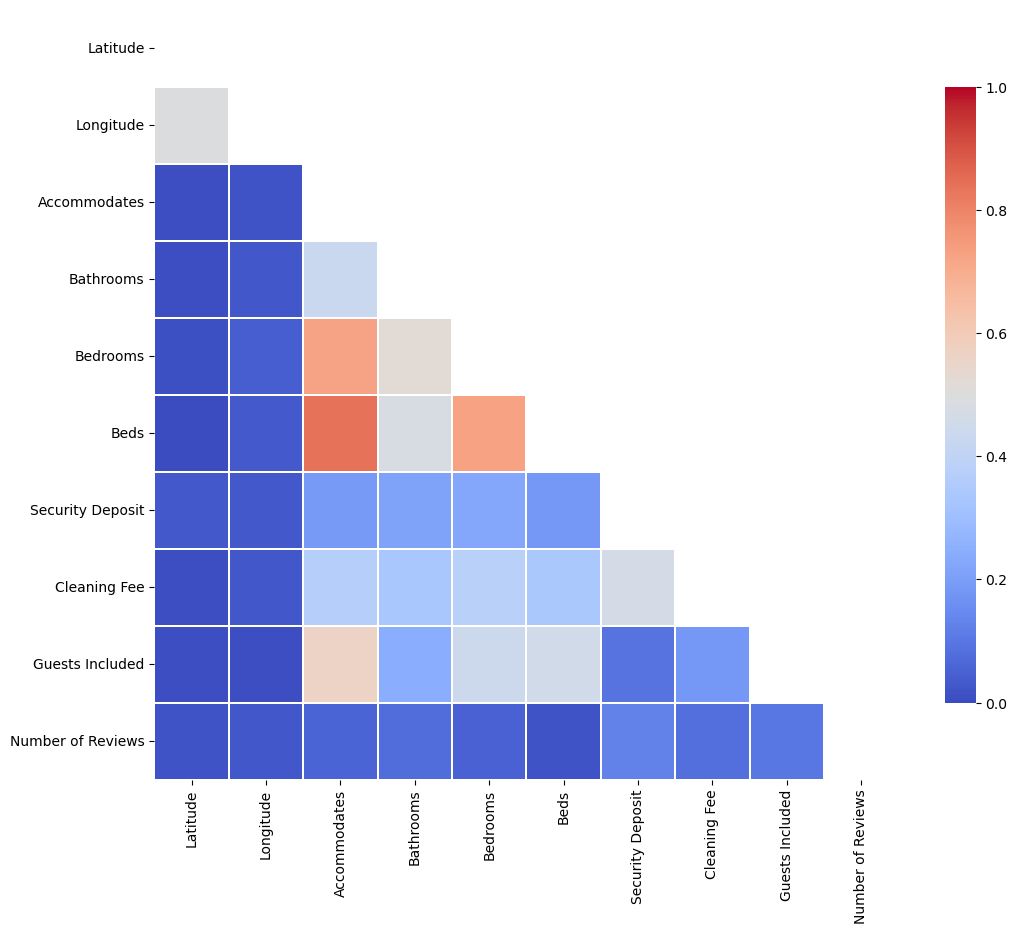

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar train
train = pd.read_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\train.csv', sep=';', decimal='.')

# Calcular la matriz de correlación (excluyendo la columna 'Price')
corr = np.abs(train.drop(['Price'], axis=1).corr())

# Generar una máscara para la parte superior del triángulo
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Configurar la figura de Matplotlib
f, ax = plt.subplots(figsize=(12, 10))

# Dibujar el mapa de calor 
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=0.1, cmap="coolwarm", cbar_kws={"shrink": 0.8})

plt.show()



In [17]:
import pandas as pd

# Cargar train
train = pd.read_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\train.csv', sep=';', decimal='.')

# Calcular la matriz de correlación (excluyendo la columna 'Price')
correlation_matrix = train.corr().abs()

# Desplegar la matriz de correlación ordenada de mayor a menor
sorted_correlation = correlation_matrix.unstack().sort_values(ascending=False)

# Crear un DataFrame a partir de los valores ordenados
sorted_correlation_df = pd.DataFrame(sorted_correlation, columns=['Correlation'])

# Mostrar la tabla de correlación ordenada
print(sorted_correlation_df)



                                     Correlation
Latitude          Latitude              1.000000
Longitude         Longitude             1.000000
Guests Included   Guests Included       1.000000
Cleaning Fee      Cleaning Fee          1.000000
Security Deposit  Security Deposit      1.000000
Price             Price                 1.000000
Bedrooms          Bedrooms              1.000000
Bathrooms         Bathrooms             1.000000
Accommodates      Accommodates          1.000000
Beds              Beds                  1.000000
Number of Reviews Number of Reviews     1.000000
Accommodates      Beds                  0.837461
Beds              Accommodates          0.837461
                  Bedrooms              0.728059
Bedrooms          Beds                  0.728059
Accommodates      Bedrooms              0.722825
Bedrooms          Accommodates          0.722825
Cleaning Fee      Price                 0.674445
Price             Cleaning Fee          0.674445
Guests Included   Ac

# Escojo Variables con mucha corelacion
Accommodates      Beds                  0.837461 --> conservo beds

<div class = "alert alert-success">5

In [18]:
# Eliminar la columna "Accommodates"
train.drop(columns=['Accommodates'], inplace=True)

# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
train.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\train.csv', sep=';', decimal='.', index=False)


In [19]:
print(train.shape)

print(train.head().T)




(11824, 26)
                                                                              0  \
Street                        Jerónimos, Madrid, Comunidad de Madrid 28014, ...   
Neighbourhood                                                         Jerónimos   
Neighbourhood Cleansed                                                Jerónimos   
Neighbourhood Group Cleansed                                             Retiro   
City                                                                     Madrid   
State                                                       Comunidad de Madrid   
Zipcode                                                                   28014   
Market                                                                   Madrid   
Smart Location                                                    Madrid, Spain   
Country Code                                                                 ES   
Country                                                                   S

Hay muchas columnas con informacion que se refiere a lo mismo:  Madrid y Spain,  busco reducirlas.
    
Columna bed type?
Number of Reviews?
Cancellation Policy?


<div class = "alert alert-success">6

In [20]:
columns_to_remove_Location = ['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode']
train.drop(columns=columns_to_remove_Location, inplace=True)

# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
train.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\train.csv', sep=';', decimal='.', index=False)


In [21]:
print(train.shape)

(11824, 20)


#Revisar Neighbourhood

<div class = "alert alert-success">7

In [22]:

TheNeighbourhoods_T = train[['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed']]
print(TheNeighbourhoods_T.head())


  Neighbourhood Neighbourhood Cleansed Neighbourhood Group Cleansed
0     Jerónimos              Jerónimos                       Retiro
1           NaN                    Sol                       Centro
2   Carabanchel           Vista Alegre                  Carabanchel
3           NaN            Embajadores                       Centro
4    Gaztambide             Gaztambide                     Chamberí


In [23]:
print(f'El dataframe tiene un total de {len(TheNeighbourhoods_T)} filas.')
missing_values = len(TheNeighbourhoods_T) - TheNeighbourhoods_T.count()
print('Valores faltantes por columna:')
print(missing_values)


El dataframe tiene un total de 11824 filas.
Valores faltantes por columna:
Neighbourhood                   4159
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed     818
dtype: int64


In [24]:
unique_values_count = TheNeighbourhoods_T.nunique()
print('Número de valores únicos por columna:')
print(unique_values_count)


Número de valores únicos por columna:
Neighbourhood                   351
Neighbourhood Cleansed          444
Neighbourhood Group Cleansed     47
dtype: int64


Comentarios:  No faltan valores en Neighbourhood Cleansed y tiene mas valores distintos .  

Neighbourhood Group Cleansed: 610 con valores faltante y con solo 46 valores unicos --> unificar en esta columna.

Relleno Neighbourhood Group Cleansed con Neighbourhood Cleansed donde aparezca NAN / NULL




<div class = "alert alert-success"> 8

In [25]:
TheNeighbourhoods_T["Final Neighbourhood"] = TheNeighbourhoods_T["Neighbourhood Group Cleansed"].fillna(TheNeighbourhoods_T["Neighbourhood Cleansed"])


In [26]:
##Comprobar que no hay valores vacíos en Final Neighbourhood

TheNeighbourhoods_T["Final Neighbourhood"].isnull().sum()


0

Contar el número de valores únicos en las columnas de tu DataFrame TheNeighbourhoods_T, puedes hacerlo de la siguiente manera:

In [27]:
TheNeighbourhoods_T.apply(lambda x: len(x.unique()))


Neighbourhood                   352
Neighbourhood Cleansed          444
Neighbourhood Group Cleansed     48
Final Neighbourhood             275
dtype: int64

<div class = "alert alert-success">9

In [28]:
train["Final Neighbourhood"] = train["Neighbourhood Group Cleansed"].fillna(train["Neighbourhood Cleansed"])
train.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)
# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
train.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\train.csv', sep=';', decimal='.', index=False)


In [29]:
# Visualizar  Price

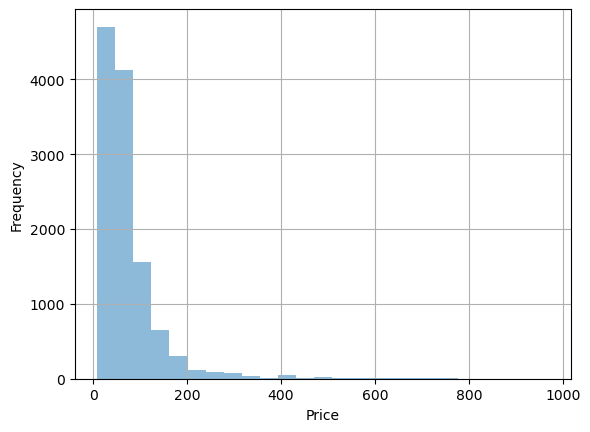

In [30]:
import matplotlib.pyplot as plt

train['Price'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.xlabel('Price')
plt.show()


<div class = "alert alert-success">10

In [31]:
import numpy as np

# Calcular el primer y tercer cuartil (Q1 y Q3)
Q1 = train['Price'].quantile(0.25)
Q3 = train['Price'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir límites para los valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers
train = train[(train['Price'] >= lower_limit) & (train['Price'] <= upper_limit)]

# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
train.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\train.csv', sep=';', decimal='.', index=False)

print(train.shape)

print(train.head().T)

(11061, 18)
                                                                     0  \
City                                                            Madrid   
Country Code                                                        ES   
Latitude                                                     40.407732   
Longitude                                                    -3.684819   
Property Type                                                Apartment   
Room Type                                              Entire home/apt   
Bathrooms                                                          1.0   
Bedrooms                                                           1.0   
Beds                                                               2.0   
Bed Type                                                      Real Bed   
Amenities            TV,Internet,Wireless Internet,Air conditioning...   
Price                                                             60.0   
Security Deposit          

In [32]:
print(train.dtypes)


City                    object
Country Code            object
Latitude               float64
Longitude              float64
Property Type           object
Room Type               object
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type                object
Amenities               object
Price                  float64
Security Deposit       float64
Cleaning Fee           float64
Guests Included          int64
Number of Reviews        int64
Cancellation Policy     object
Final Neighbourhood     object
dtype: object


Convertir las columnas numericas en Float

<div class = "alert alert-success">11

In [33]:
# Lista de nombres de columnas numéricas
columnas_numericas = [ 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Number of Reviews']

# Convertir las columnas numéricas a tipo de dato float
train[columnas_numericas] = train[columnas_numericas].astype(float)

# Verificar los tipos de datos actualizados
print(train.dtypes)

# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
train.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\train.csv', sep=';', decimal='.', index=False)


City                    object
Country Code            object
Latitude               float64
Longitude              float64
Property Type           object
Room Type               object
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type                object
Amenities               object
Price                  float64
Security Deposit       float64
Cleaning Fee           float64
Guests Included        float64
Number of Reviews      float64
Cancellation Policy     object
Final Neighbourhood     object
dtype: object


In [34]:
print(f"Número de registros con cero baños: {len(train[train['Bathrooms'] == 0])}")
print(f"Número de registros con precio cero: {len(train[train['Price'] == 0])}")


Número de registros con cero baños: 53
Número de registros con precio cero: 0


<div class = "alert alert-success">12

In [35]:
# Lista de columnas numéricas que quieres limpiar
columns_to_clean = ['Bathrooms', 'Price']

# Elimina filas con valores nulos en las columnas especificadas
train = train.dropna(subset=columns_to_clean)

# Elimina filas donde el precio es igual a cero o menor
train = train[train['Price'] > 0]

# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
train.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\train.csv', sep=';', decimal='.', index=False)


Hallar missing values en columnas tipo OBJECT

In [36]:
# Selecciona las columnas de tipo "object"
object_columns = train.select_dtypes(include=['object'])

# Calcula la cantidad de valores faltantes por columna
missing_values = object_columns.isnull().sum()

# Imprime la cantidad de valores faltantes por columna
print(missing_values)


City                    2
Country Code            0
Property Type           0
Room Type               0
Bed Type                0
Amenities              69
Cancellation Policy     0
Final Neighbourhood     0
dtype: int64


Amenities: SOLO 69 valores en columnas objeto,  pero se trata de tipo objeto --> la elimino

In [37]:
# Seleccionar las columnas numéricas
numeric_columns = train.select_dtypes(include=['float64', 'int64'])

# Contar los valores NaN en cada columna numérica
nan_counts = numeric_columns.isna().sum()

# Imprimir el conteo de NaN por columna
print(nan_counts)


Latitude                0
Longitude               0
Bathrooms               0
Bedrooms               20
Beds                   18
Price                   0
Security Deposit     6335
Cleaning Fee         4497
Guests Included         0
Number of Reviews       0
dtype: int64


<div class = "alert alert-success">13

In [38]:
# Rellenar los valores NaN en las columna 'Amenities'

train['Amenities'].fillna("", inplace=True)

# Aplicar la transformación para contar los elementos separados por comas en las columnas 'Features', 'Amenities' y 'Host Verifications'

train['Amenities'] = train['Amenities'].apply(lambda x: len(str(x).split(',')))


<div class = "alert alert-success">14

In [39]:
# Calcular la media de cada columna numérica
mean_values = train.mean()

# Rellenar los valores NaN en las columnas numéricas con la media correspondiente
train['Bedrooms'].fillna(mean_values['Bedrooms'], inplace=True)
train['Beds'].fillna(mean_values['Beds'], inplace=True)
train['Security Deposit'].fillna(mean_values['Security Deposit'], inplace=True)
train['Cleaning Fee'].fillna(mean_values['Cleaning Fee'], inplace=True)


In [40]:
train.describe ()

,Latitude,Longitude,Bathrooms,Bedrooms,Beds,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Number of Reviews
count,11024.000000,11024.000000,11024.000000,11024.000000,11024.000000,11024.000000,11024.000000,11024.000000,11024.000000,11024.000000,11024.000000
mean,40.507083,-3.839924,1.216845,1.240822,1.889242,14.224329,59.689314,179.198123,27.940708,1.515512,23.410287
std,4.398393,13.052738,0.543815,0.738259,1.345577,4.714206,33.968523,67.181835,14.518708,0.953388,38.644824
min,-37.851182,-123.124429,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,40.409772,-3.707629,1.000000,1.000000,1.000000,11.000000,32.000000,179.198123,20.000000,1.000000,1.000000
50%,40.419092,-3.701032,1.000000,1.000000,1.000000,14.000000,52.000000,179.198123,27.940708,1.000000,7.000000
75%,40.430461,-3.686902,1.000000,1.000000,2.000000,17.000000,80.000000,179.198123,30.000000,2.000000,28.250000
max,55.966912,153.371427,8.000000,10.000000,16.000000,39.000000,166.000000,990.000000,200.000000,16.000000,356.000000


In [41]:
# Verificar los nombres de las columnas en tu DataFrame train
print(train.columns)



Index(['City', 'Country Code', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Number of Reviews', 'Cancellation Policy', 'Final Neighbourhood'],
      dtype='object')


<div class = "alert alert-success">15

## aqui he tenido varios inconvenientes cuando reinicio el kernel

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

# lista de variables categóricas
categorical = ['City', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy','Final Neighbourhood','Country Code']

# Crear un DataFrame para almacenar los mapeos de medias
mean_map = {}

# Iterar a través de cada columna categórica
for c in categorical:
    # Calcular la media de 'Price' para cada categoría en la columna categórica
    mean = train.groupby(c)['Price'].mean()
    
    # Mapear los valores de 'Price' promedio a la columna categórica
    train[c] = train[c].map(mean)
    
    # Guardar el mapeo en el diccionario mean_map
    mean_map[c] = mean




In [50]:
# Verificar qué columnas contienen valores NaN
nan_columns = train.columns[train.isna().any()]

# Contar la cantidad de NaN en cada columna
nan_counts = train[nan_columns].isna().sum()

# Mostrar las columnas y la cantidad de NaN en cada una
print(nan_counts)


Series([], dtype: float64)


<div class = "alert alert-success">16

In [51]:
# Reemplazar NaN por cadenas vacías en la columna 'City' de train
train['City'].fillna("", inplace=True)



In [52]:
print(train.dtypes)


City                   float64
Country Code           float64
Latitude               float64
Longitude              float64
Property Type          float64
Room Type              float64
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type               float64
Amenities              float64
Price                  float64
Security Deposit       float64
Cleaning Fee           float64
Guests Included        float64
Number of Reviews      float64
Cancellation Policy    float64
Final Neighbourhood    float64
dtype: object


# 4 Construcción y validación del modelo

Mejor puntuación de validación cruzada media: -424.828
Mejores parámetros: {'alpha': 0.03162277660168379}


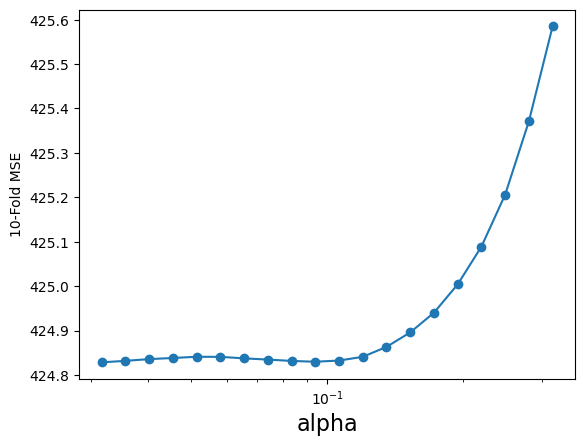

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Crear las matrices de características (X) y etiquetas (y)
y_train = train['Price'].values  # Columna 'Price' como variable objetivo
X_train = train.drop(columns=['Price']).values  # Resto de las columnas como características

# Obtener los nombres de las características
feature_names = train.drop(columns=['Price']).columns

# Escalar (con los datos de entrenamiento)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1.5, -0.5, 20)

param_grid = {'alpha': alpha_vector}
grid = GridSearchCV(Lasso(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=10)
grid.fit(XtrainScaled, y_train)
print("Mejor puntuación de validación cruzada media: {:.3f}".format(grid.best_score_))
print("Mejores parámetros: {}".format(grid.best_params_))

scores = -1 * np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector, scores, '-o')
plt.xlabel('alpha', fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()


Comentarios: Mejor valor de alpha (hiperparámetro de regularización): alrededor de 0.0316.
Puntuación media de validación cruzada: aproximadamente -411.347.  los resultados indican que has encontrado un valor de alpha que regula efectivamente el modelo Lasso y que el modelo parece funcionar bien en términos de error cuadrático medio en los datos de validación cruzada. 

In [54]:
# 0
test = pd.read_csv(r"C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\test.csv", sep=';', decimal='.')


In [55]:
# 1
columnas_a_eliminar = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'House Rules',
    'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
    'Host About', 'Host Response Time', 'Host Response Rate',
    'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
    'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count',
    'Host Verifications', 'Extra People', 'Minimum Nights', 'Maximum Nights',
    'Calendar Updated', 'Has Availability', 'Availability 30',
    'Availability 60', 'Availability 90', 'Availability 365',
    'Calendar last Scraped', 'First Review', 'Last Review', 'License',
    'Jurisdiction Names', 'Calculated host listings count', 'Reviews per Month',
    'Geolocation', 'Features' 
]

# Eliminar las columnas del conjunto de test
test = test.drop(columns=columnas_a_eliminar)

# Verificar las nuevas dimensiones de los conjuntos de entrenamiento
print(f'Dimensiones del conjunto de entrenamiento después de eliminar columnas: {test.shape}')

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
test.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\test.csv', sep=';', decimal='.', index=False)

Dimensiones del conjunto de entrenamiento después de eliminar columnas: (2956, 47)


In [56]:
# 2
# Lista de columnas a eliminar por tener demasiado texto (requieren análisis NLP)
columnas_texto = [
    'Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
    'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction'
]

# Eliminar las columnas de texto del conjunto de test
test = test.drop(columns=columnas_texto)

# Verificar las nuevas dimensiones del conjunto de test
print(f'Dimensiones del conjunto de entrenamiento después de eliminar columnas de texto: {test.shape}')

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
test.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\test.csv', sep=';', decimal='.', index=False)


Dimensiones del conjunto de entrenamiento después de eliminar columnas de texto: (2956, 37)


In [57]:
# 3
# Calcular la cantidad de NaN en cada columna del conjunto de entrenamiento
nan_counts_test = test.isna().sum()

# Establecer un umbral
threshold = 100


# Filtrar las columnas con un número específico de NaN
columns_with_many_nan_test = nan_counts_test[nan_counts_test > threshold].index.tolist()

# Ordenar las columnas por la cantidad de NaN en orden descendente (de mayor a menor)
columns_with_many_nan_test = sorted(columns_with_many_nan_test, key=lambda x: nan_counts_test[x], reverse=True)

# Iterar a través de las columnas ordenadas y mostrar sus nombres y cantidades
for column_name in columns_with_many_nan_test:
    nan_count = nan_counts_test[column_name]
    print(f'Columna: {column_name}, NaN Count: {nan_count}')



Columna: Square Feet, NaN Count: 2832
Columna: Monthly Price, NaN Count: 2264
Columna: Weekly Price, NaN Count: 2247
Columna: Security Deposit, NaN Count: 1752
Columna: Cleaning Fee, NaN Count: 1243
Columna: Neighbourhood, NaN Count: 1070
Columna: Review Scores Checkin, NaN Count: 649
Columna: Review Scores Location, NaN Count: 649
Columna: Review Scores Value, NaN Count: 649
Columna: Review Scores Accuracy, NaN Count: 645
Columna: Review Scores Cleanliness, NaN Count: 644
Columna: Review Scores Rating, NaN Count: 643
Columna: Review Scores Communication, NaN Count: 643
Columna: Neighbourhood Group Cleansed, NaN Count: 202
Columna: Zipcode, NaN Count: 108


In [58]:
# 4 

columns_with_na_to_remove = [
    'Review Scores Location', 'Review Scores Value',
    'Review Scores Checkin', 'Review Scores Accuracy', 'Review Scores Communication',
    'Review Scores Cleanliness', 'Review Scores Rating', 'Square Feet', 
    'Monthly Price', 'Weekly Price'
]

test.drop(columns=columns_with_na_to_remove, inplace=True)

# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
test.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\test.csv', sep=';', decimal='.', index=False)



In [59]:
# 5# Eliminar la columna "Accommodates"
test.drop(columns=['Accommodates'], inplace=True)

# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
test.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\test.csv', sep=';', decimal='.', index=False)


In [60]:
##6 
columns_to_remove_Location = ['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode']
test.drop(columns=columns_to_remove_Location, inplace=True)

# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
test.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\test.csv', sep=';', decimal='.', index=False)


In [61]:
# 7

TheNeighbourhoods_Test = test[['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed']]
TheNeighbourhoods_Test["Final Neighbourhood"] = TheNeighbourhoods_Test["Neighbourhood Group Cleansed"].fillna(TheNeighbourhoods_Test["Neighbourhood Cleansed"])


In [62]:
# 8
TheNeighbourhoods_Test["Final Neighbourhood"] = TheNeighbourhoods_Test["Neighbourhood Group Cleansed"].fillna(TheNeighbourhoods_Test["Neighbourhood Cleansed"])


In [63]:
# 9

test["Final Neighbourhood"] = test["Neighbourhood Group Cleansed"].fillna(test["Neighbourhood Cleansed"])
test.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)
# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
test.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\test.csv', sep=';', decimal='.', index=False)


In [64]:
# 10

import numpy as np

# Calcular el primer y tercer cuartil (Q1 y Q3)
Q1 = test['Price'].quantile(0.25)
Q3 = test['Price'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir límites para los valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers
test = test[(test['Price'] >= lower_limit) & (test['Price'] <= upper_limit)]

# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
test.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\test.csv', sep=';', decimal='.', index=False)

print(test.shape)



(2766, 18)


In [65]:
# 11
# Lista de nombres de columnas numéricas
columnas_numericas = [ 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Number of Reviews']

# Convertir las columnas numéricas a tipo de dato float
test[columnas_numericas] = test[columnas_numericas].astype(float)

# Verificar los tipos de datos actualizados
print(test.dtypes)

# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
test.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\test.csv', sep=';', decimal='.', index=False)


City                    object
Country Code            object
Latitude               float64
Longitude              float64
Property Type           object
Room Type               object
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type                object
Amenities               object
Price                  float64
Security Deposit       float64
Cleaning Fee           float64
Guests Included        float64
Number of Reviews      float64
Cancellation Policy     object
Final Neighbourhood     object
dtype: object


In [66]:
# 12

# Lista de columnas numéricas que quieres limpiar
columns_to_clean = ['Bathrooms', 'Price']

# Elimina filas con valores nulos en las columnas especificadas
test = test.dropna(subset=columns_to_clean)

# Elimina filas donde el precio es igual a cero o menor
test = test[test['Price'] > 0]

# Guardar el conjunto de entrenamiento actualizado en un archivo CSV
test.to_csv(r'C:\Users\USER\Desktop\DayanaFrepost\machine-learning\Entrega Dayana\test.csv', sep=';', decimal='.', index=False)


In [67]:
# 13
# Rellenar los valores NaN en las columna 'Amenities'

test['Amenities'].fillna("", inplace=True)

# Aplicar la transformación para contar los elementos separados por comas en las columnas 'Features', 'Amenities' y 'Host Verifications'

test['Amenities'] = test['Amenities'].apply(lambda x: len(str(x).split(',')))


In [68]:
#14

# Calcular la media de cada columna numérica
mean_values = test.mean()

# Rellenar los valores NaN en las columnas numéricas con la media correspondiente
test['Bedrooms'].fillna(mean_values['Bedrooms'], inplace=True)
test['Beds'].fillna(mean_values['Beds'], inplace=True)
test['Security Deposit'].fillna(mean_values['Security Deposit'], inplace=True)
test['Cleaning Fee'].fillna(mean_values['Cleaning Fee'], inplace=True)


In [69]:
# 15
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

# lista de variables categóricas
categorical = ['City', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy','Final Neighbourhood','Country Code']

# Crear un DataFrame para almacenar los mapeos de medias
mean_map = {}

# Iterar a través de cada columna categórica
for c in categorical:
    # Calcular la media de 'Price' para cada categoría en la columna categórica
    mean = test.groupby(c)['Price'].mean()
    
    # Mapear los valores de 'Price' promedio a la columna categórica
    test[c] = test[c].map(mean)
    
    # Guardar el mapeo en el diccionario mean_map
    mean_map[c] = mean

In [70]:
# 16

# Reemplazar NaN por cadenas vacías en la columna 'City' de test
test['City'].fillna("", inplace=True)


In [81]:
# Categorizamos con los datos de train!
for c in categorical:
    test[c] = test[c].map(mean_map[c])

# Comprobamos que no quedan valores no numéricos
test[categorical].dtypes

City                   float64
Property Type          float64
Room Type              float64
Bed Type               float64
Amenities              float64
Cancellation Policy    float64
Final Neighbourhood    float64
Country Code           float64
dtype: object

In [82]:
# Obtener la lista de columnas de df_test
cols = test.columns.tolist()

# Mover la columna 'Price' al principio de la lista
cols.insert(0, cols.pop(cols.index('Price')))

# Reorganizar las columnas de test de acuerdo a la nueva lista de columnas
test = test[cols]

# Rellenar los valores NaN en el conjunto de prueba con la media de las columnas
test.fillna(test.mean(), inplace=True)

# Imprimir las formas de los conjuntos de entrenamiento y prueba
print(train.shape, test.shape)


(11024, 18) (2755, 18)


In [95]:
from sklearn.impute import SimpleImputer

# Ajustar el imputador a los datos de entrenamiento y luego transformar X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Escalar el conjunto de entrenamiento
X_train_scaled = scaler.transform(X_train_imputed)

# Imputar valores faltantes en el conjunto de prueba y escalarlo utilizando el mismo imputador y scaler
X_test_imputed = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)

# Ajustar el modelo Ridge en el conjunto de entrenamiento
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=alpha_optimo)  # Ajusta el hiperparámetro alpha según lo necesario
ridge.fit(X_train_scaled, y_train)

# Realizar predicciones con el modelo Ridge en el conjunto de prueba
y_test_ridge = ridge.predict(X_test_scaled)

# Calcular el error cuadrado medio en los datos de prueba
from sklearn.metrics import mean_squared_error
mse_test_ridge = mean_squared_error(y_test, y_test_ridge)
print("MSE Modelo Ridge (test):", mse_test_ridge)


MSE Modelo Ridge (test): 811.5073422943628


In [98]:
# Ajusta el SimpleImputer a los datos de entrenamiento
imputer = SimpleImputer(strategy='mean')  # Crea un nuevo imputador
imputer.fit(X_train)  # Ajusta el imputador a X_train

# Luego, puedes transformar los datos de prueba
X_test_imputed = imputer.transform(X_test)

# Escala los datos de prueba utilizando el mismo scaler que se ajustó a los datos de entrenamiento
X_test_scaled = scaler.transform(X_test_imputed)

# Realizar predicciones con el modelo Ridge en el conjunto de prueba
y_test_ridge = ridge.predict(X_test_scaled)

# Calcular el error cuadrado medio en los datos de prueba
from sklearn.metrics import mean_squared_error
mse_test_ridge = mean_squared_error(y_test, y_test_ridge)
print("MSE Modelo Ridge (test):", mse_test_ridge)




MSE Modelo Ridge (test): 811.5073422943628


Conclusiones :

La conclusión principal de este resultado es que el modelo Ridge tiene un rendimiento relativamente bueno en el conjunto de prueba, ya que el Error Cuadrático Medio (MSE) es razonablemente bajo. 

Rendimiento Aceptable: Un MSE de alrededor de 811.51 indica que el modelo Ridge está haciendo predicciones bastante precisas en comparación con los valores reales en el conjunto de prueba. 


En resumen, el modelo Ridge parece ser una elección sólida para este problema de regresión.

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error



In [100]:
# Crear una instancia del modelo
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)

# Ajustar el modelo a los datos de entrenamiento
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=0)

In [102]:
from sklearn.impute import SimpleImputer

# Crea una instancia del imputador y ajústalo a los datos de entrenamiento
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

# Luego, puedes transformar los datos de prueba
X_test_imputed = imputer.transform(X_test)


In [103]:
from sklearn.preprocessing import StandardScaler

# Crea una instancia del escalador y ajústalo a los datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)

# Luego, puedes transformar los datos de prueba
X_test_scaled = scaler.transform(X_test_imputed)


In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular el MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calcular el MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calcular R²
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE: {mse_rf}")
print(f"MAE: {mae_rf}")
print(f"R²: {r2_rf}")



MSE: 2021.7266714906018
MAE: 33.09192106046772
R²: -0.7723319597780673


Conclusiones : Los resultados de las métricas de evaluación de tu modelo de Random Forest son los siguientes:

MSE (Error Cuadrado Medio): 2021.73 El Error Cuadrado Medio es relativamente alto, lo que sugiere que el modelo tiene dificultades para hacer predicciones precisas, un valor de 2021.73 es bastante alto y sugiere que las predicciones del modelo están bastante dispersas y alejadas de los valores reales.

MAE (Error Absoluto Medio): 33.09 Un MAE de 33.09 indica que, en promedio, las predicciones del modelo están desviadas de los valores reales en aproximadamente 33.09 

R² (Coeficiente de Determinación): -0.77 El Coeficiente de Determinación mide la proporción de la varianza en la variable dependiente que es explicada por el modelo. Un valor de -0.77 es bastante bajo y sugiere que el modelo no se ajusta bien a los datos. En realidad, un valor negativo significa que el modelo es peor que un simple modelo lineal que predice la media de los datos.



In [118]:

imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)


SimpleImputer()

In [119]:
# Utiliza el mismo imputador que se ajustó a los datos de entrenamiento
X_test_imputed = imputer.transform(X_test)


In [120]:
from sklearn.impute import SimpleImputer

# Ajustar el imputador a los datos de entrenamiento
imputer.fit(X_train)

# Luego
X_test_imputed = imputer.transform(X_test)



In [121]:
# Utiliza el mismo scaler que se ajustó a los datos de entrenamiento
X_test_scaled = scaler.transform(X_test_imputed)


In [123]:
from sklearn.impute import SimpleImputer

# Ajustar el imputador a los datos de entrenamiento
imputer.fit(X_train)

# Luego, puedes transformar los datos de prueba
X_test_imputed = imputer.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

# Crear y ajustar el modelo Random Forest
rf = RandomForestRegressor(oob_score=True)
rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_predict = rf.predict(X_test_imputed)

# Calcular métricas de evaluación
rf_testing_set_score = rf.score(X_test_imputed, y_test)
rf_median_abs_error = median_absolute_error(y_test, y_predict)
rf_mean_abs_error = mean_absolute_error(y_test, y_predict)

# Imprimir resultados
print('R^2 en datos de test: ' + str(round(rf_testing_set_score, 3)))
print('Mediana del error en datos de test: ' + str(round(rf_median_abs_error, 3)))
print('Media del error en datos de test: ' + str(round(rf_mean_abs_error, 3)))



R^2 en datos de test: 0.093
Mediana del error en datos de test: 22.92
Media del error en datos de test: 26.05


Conclusiones :

Los resultados de tu modelo Random Forest en los datos de prueba son los siguientes:

R^2 en datos de test: 0.093: Un valor de 0.093 sugiere que el modelo explica aproximadamente el 9.3% de la variabilidad en los datos de prueba.

Mediana del error en datos de test: 22.92: La mediana del error es la mitad del valor de todos los errores de predicción. el modelo tiende a cometer errores de predicción de alrededor de 22.92 unidades en los datos de prueba.

Media del error en datos de test: 26.05: el modelo tiende a cometer errores de predicción de alrededor de 26.05  en los datos de prueba.

El modelo Random Forest parece explicar una pequeña parte de la variabilidad en los datos de prueba, pero los errores de predicción son relativamente altos en términos de mediana y media. Esto sugiere que el modelo podría no ser muy preciso en la predicción de la variable objetivo en estos datos. 

Si tuviera mas tiempo haria otras consideraciones, para tratar de tener mejores resultados.